In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sale_tasks_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 18691 non-null  int64  
 1   age                         18509 non-null  object 
 2   gender_cd                   18433 non-null  object 
 3   region_size                 11402 non-null  object 
 4   foreign_flg                 11402 non-null  float64
 5   entrepreneur_flg            11402 non-null  float64
 6   auto_flg                    11402 non-null  float64
 7   traveler_flg                11402 non-null  float64
 8   partnership_flg             11402 non-null  float64
 9   child_amt                   11402 non-null  float64
 10  realty_type                 11402 non-null  object 
 11  segment_cd                  11402 non-null  object 
 12  bundle_nm                   4703 non-null   object 
 13  confirmed_income            140

In [4]:
data['age'] = data['age'].apply(lambda x: float(x.replace(',', '.') if pd.notna(x) else x))
data['finish_dttm'] = pd.to_datetime(data['finish_dttm'])

In [5]:
data['weekday'] = data['finish_dttm'].dt.dayofweek
data['segment_number'] = data['segment_cd'].apply(lambda x: int(x.split()[0].split('_')[1]) if pd.notna(x) else x)

In [6]:
data[['finish_dttm', 'weekday', 'segment_cd', 'segment_number']].head()

,finish_dttm,weekday,segment_cd,segment_number
0,2022-04-12 07:00:00,1,NaN,NaN
1,2023-10-25 20:00:00,2,r_01 (6),1.0
2,2023-06-16 07:00:00,4,t_05 (19),5.0
3,2022-09-23 12:00:00,4,t_07 (29),7.0
4,2023-02-27 16:00:00,0,NaN,NaN


не берём колонки "confirmed_income", "predicted_income" и "emp_children_cnt"; так как слишком много пропусков и непонятно, как заполнять.

In [7]:
numeric_columns = ['customer_id', 'age', 'foreign_flg', 'entrepreneur_flg', 'auto_flg',
                   'traveler_flg', 'partnership_flg', 'child_amt', 'segment_number', 'weekday', 'state_talk_time_sec',
                   'employee_id', 'emp_age', 'emp_work_months_cnt']
numeric_data = data[numeric_columns]
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          18691 non-null  int64  
 1   age                  18509 non-null  float64
 2   foreign_flg          11402 non-null  float64
 3   entrepreneur_flg     11402 non-null  float64
 4   auto_flg             11402 non-null  float64
 5   traveler_flg         11402 non-null  float64
 6   partnership_flg      11402 non-null  float64
 7   child_amt            11402 non-null  float64
 8   segment_number       11402 non-null  float64
 9   weekday              18691 non-null  int32  
 10  state_talk_time_sec  18543 non-null  float64
 11  employee_id          18691 non-null  float64
 12  emp_age              18691 non-null  int64  
 13  emp_work_months_cnt  18691 non-null  int64  
dtypes: float64(10), int32(1), int64(3)
memory usage: 1.9 MB


In [8]:
clean_numeric_data = numeric_data.dropna()
clean_numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11268 entries, 1 to 18688
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          11268 non-null  int64  
 1   age                  11268 non-null  float64
 2   foreign_flg          11268 non-null  float64
 3   entrepreneur_flg     11268 non-null  float64
 4   auto_flg             11268 non-null  float64
 5   traveler_flg         11268 non-null  float64
 6   partnership_flg      11268 non-null  float64
 7   child_amt            11268 non-null  float64
 8   segment_number       11268 non-null  float64
 9   weekday              11268 non-null  int32  
 10  state_talk_time_sec  11268 non-null  float64
 11  employee_id          11268 non-null  float64
 12  emp_age              11268 non-null  int64  
 13  emp_work_months_cnt  11268 non-null  int64  
dtypes: float64(10), int32(1), int64(3)
memory usage: 1.2 MB


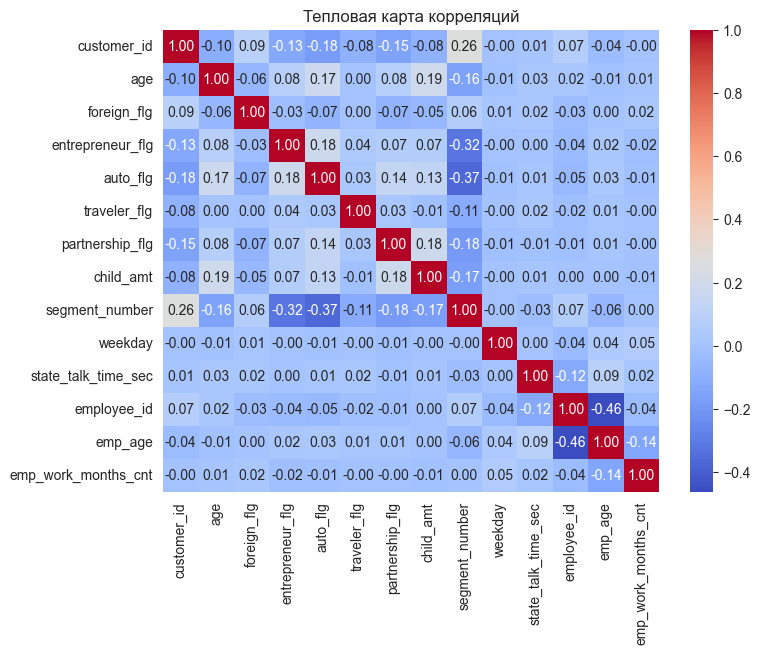

In [9]:
correlation_matrix = clean_numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

In [10]:
filled_numeric_data = numeric_data.copy()

In [11]:
flag_columns = ["foreign_flg", "entrepreneur_flg", 'auto_flg', "traveler_flg", 'partnership_flg', 'child_amt']

filled_numeric_data[flag_columns] = filled_numeric_data[flag_columns].fillna(0)
filled_numeric_data = filled_numeric_data.drop(columns=['segment_number'])
filled_numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          18691 non-null  int64  
 1   age                  18509 non-null  float64
 2   foreign_flg          18691 non-null  float64
 3   entrepreneur_flg     18691 non-null  float64
 4   auto_flg             18691 non-null  float64
 5   traveler_flg         18691 non-null  float64
 6   partnership_flg      18691 non-null  float64
 7   child_amt            18691 non-null  float64
 8   weekday              18691 non-null  int32  
 9   state_talk_time_sec  18543 non-null  float64
 10  employee_id          18691 non-null  float64
 11  emp_age              18691 non-null  int64  
 12  emp_work_months_cnt  18691 non-null  int64  
dtypes: float64(9), int32(1), int64(3)
memory usage: 1.8 MB


In [12]:
filled_numeric_data = filled_numeric_data.dropna()

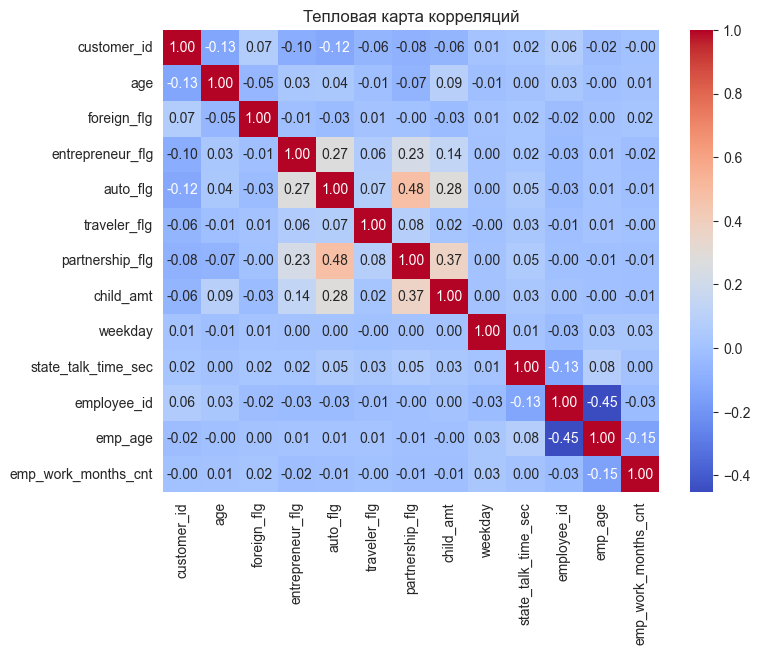

In [13]:
correlation_matrix_2 = filled_numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

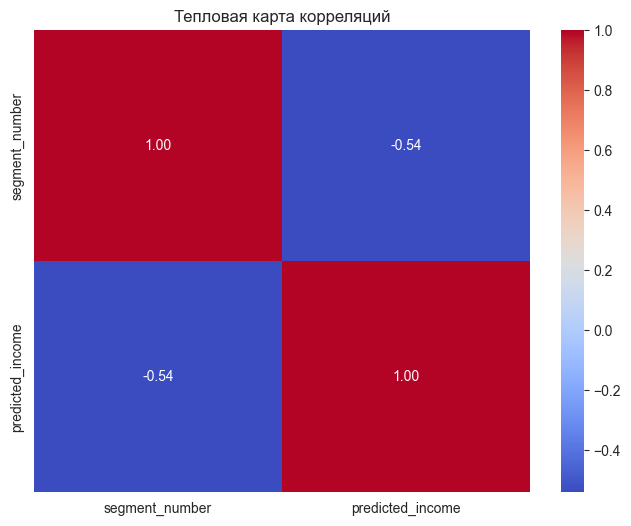

In [14]:
predicted_income_data = data[["segment_number", 'predicted_income']].dropna()

correlation_matrix_2 = predicted_income_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

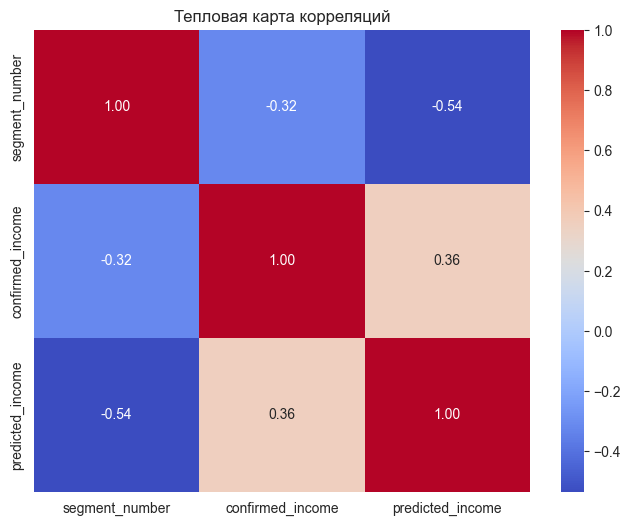

In [15]:
plt.show()
predicted_income_data = data[["segment_number", 'confirmed_income', 'predicted_income']].dropna()

correlation_matrix_2 = predicted_income_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

In [16]:
def get_cor_by_category(column):
    categories = data[column].unique()
    correlations_by_category = {}

    for category in categories:
        group_data = clean_numeric_data[data[column] == category]
        correlations_by_category[category] = group_data.corr()

    return correlations_by_category

In [17]:
cor_gender = get_cor_by_category('gender_cd')
cor_gender.keys()

C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_18688\2447178412.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_data = clean_numeric_data[data[column] == category]
C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_18688\2447178412.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_data = clean_numeric_data[data[column] == category]
C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_18688\2447178412.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_data = clean_numeric_data[data[column] == category]


dict_keys(['F', 'M', nan])

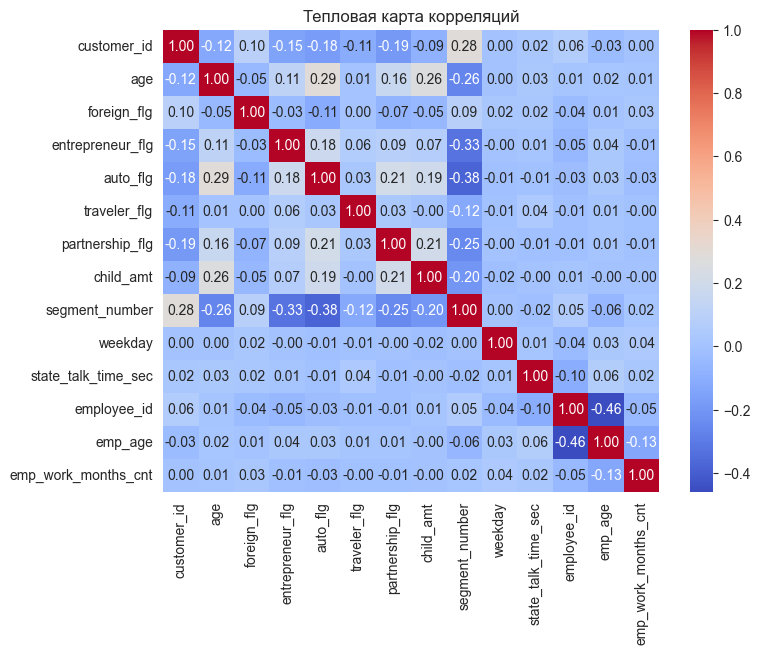

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor_gender['M'], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

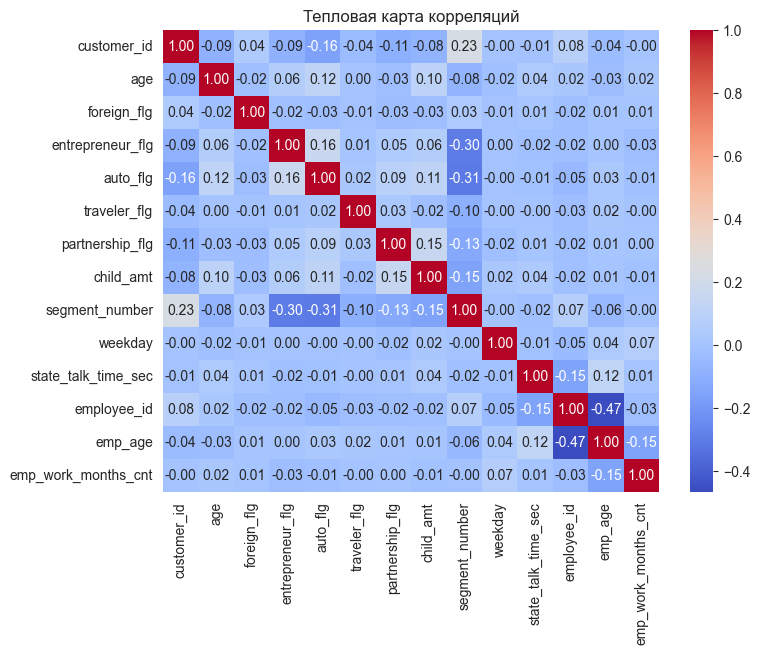

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor_gender['F'], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

In [20]:
def get_cor_to_result(column):
    """Функция возвращает корреляцию к результату звонка от подаваемого признака"""
    unique_combinations = data.groupby([column, 'wo_hit_status_result_desc']).size().unstack()
    unique_combinations['total'] = unique_combinations['Дозвон, Отказ'] + unique_combinations['Дозвон, Успешно']
    unique_combinations['ratio_false'] = unique_combinations['Дозвон, Отказ'] / unique_combinations['total']
    unique_combinations['ratio_true'] = unique_combinations['Дозвон, Успешно'] / unique_combinations['total']
    return unique_combinations

In [21]:
get_cor_to_result('weekday')

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
weekday,,,,,
0,3044,495,3539,0.860130,0.139870
1,2995,422,3417,0.876500,0.123500
2,2878,388,3266,0.881200,0.118800
3,2923,410,3333,0.876988,0.123012
4,2812,399,3211,0.875740,0.124260
5,1001,168,1169,0.856287,0.143713
6,621,135,756,0.821429,0.178571


In [22]:
get_cor_to_result('gender_cd')

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
gender_cd,,,,,
F,7568,984,8552,0.884939,0.115061
M,8518,1363,9881,0.862058,0.137942


In [23]:
get_cor_to_result("region_size")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
region_size,,,,,
msk,1387,172,1559,0.889673,0.110327
rural,933,195,1128,0.827128,0.172872
town,5154,900,6054,0.851338,0.148662
urban,2342,319,2661,0.880120,0.119880


In [24]:
get_cor_to_result("child_amt")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
child_amt,,,,,
0.0,6931.0,1098.0,8029.0,0.863246,0.136754
1.0,2245.0,388.0,2633.0,0.852640,0.147360
2.0,507.0,73.0,580.0,0.874138,0.125862
3.0,112.0,24.0,136.0,0.823529,0.176471
4.0,15.0,1.0,16.0,0.937500,0.062500
5.0,5.0,2.0,7.0,0.714286,0.285714
7.0,1.0,NaN,NaN,NaN,NaN


In [25]:
get_cor_to_result('emp_work_months_cnt')

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
emp_work_months_cnt,,,,,
0,1316,230,1546,0.851229,0.148771
1,1624,150,1774,0.915445,0.084555
2,1246,189,1435,0.868293,0.131707
3,1926,226,2152,0.894981,0.105019
4,1250,233,1483,0.842886,0.157114
5,854,85,939,0.909478,0.090522
6,1436,406,1842,0.779587,0.220413
7,856,88,944,0.906780,0.093220
8,1763,298,2061,0.855410,0.144590


In [26]:
get_cor_to_result('product_cd')

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
product_cd,,,,,
Car Loan,233.0,57.0,290.0,0.803448,0.196552
Casco,265.0,55.0,320.0,0.828125,0.171875
Cash Loan,2391.0,290.0,2681.0,0.891831,0.108169
Credit Cards,9053.0,787.0,9840.0,0.920020,0.079980
Debit Cards,1190.0,696.0,1886.0,0.630965,0.369035
Deposit,11.0,NaN,NaN,NaN,NaN
Investment,763.0,107.0,870.0,0.877011,0.122989
MVNO,1557.0,346.0,1903.0,0.818182,0.181818
Mortgage Insurance,344.0,29.0,373.0,0.922252,0.077748


In [27]:
get_cor_to_result("functional_cd")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
functional_cd,,,,,
Activation,94.0,2.0,96.0,0.979167,0.020833
Afterfilling,1994.0,358.0,2352.0,0.847789,0.152211
Agreement,429.0,118.0,547.0,0.784278,0.215722
Autoleads,45.0,2.0,47.0,0.957447,0.042553
BAF,67.0,18.0,85.0,0.788235,0.211765
Cold,1400.0,137.0,1537.0,0.910865,0.089135
Deposit,11.0,NaN,NaN,NaN,NaN
Downsell,201.0,28.0,229.0,0.877729,0.122271
Incoming,238.0,123.0,361.0,0.659280,0.340720


In [28]:
get_cor_to_result("realty_type")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
realty_type,,,,,
Жилой дом,111,19,130,0.853846,0.146154
Квартира,5062,669,5731,0.883266,0.116734
Комната,85,11,96,0.885417,0.114583
Нет своего жилья,4558,887,5445,0.837098,0.162902


In [29]:
get_cor_to_result("age")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
age,,,,,
8.0,1.0,NaN,NaN,NaN,NaN
10.0,3.0,NaN,NaN,NaN,NaN
11.0,2.0,NaN,NaN,NaN,NaN
12.0,5.0,NaN,NaN,NaN,NaN
13.0,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
81.0,1.0,NaN,NaN,NaN,NaN
82.0,1.0,NaN,NaN,NaN,NaN
83.0,3.0,NaN,NaN,NaN,NaN


In [30]:
get_cor_to_result("emp_age")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
emp_age,,,,,
18,295.0,12.0,307.0,0.960912,0.039088
19,718.0,28.0,746.0,0.962466,0.037534
20,1063.0,105.0,1168.0,0.910103,0.089897
21,886.0,81.0,967.0,0.916236,0.083764
22,557.0,239.0,796.0,0.699749,0.300251
23,772.0,77.0,849.0,0.909305,0.090695
24,463.0,52.0,515.0,0.899029,0.100971
25,568.0,76.0,644.0,0.881988,0.118012
26,347.0,27.0,374.0,0.927807,0.072193


In [31]:
get_cor_to_result("emp_gender_cd")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
emp_gender_cd,,,,,
M,2657,371,3028,0.877477,0.122523
W,11729,1754,13483,0.869910,0.130090


In [32]:
get_cor_to_result("emp_work_months_cnt")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
emp_work_months_cnt,,,,,
0,1316,230,1546,0.851229,0.148771
1,1624,150,1774,0.915445,0.084555
2,1246,189,1435,0.868293,0.131707
3,1926,226,2152,0.894981,0.105019
4,1250,233,1483,0.842886,0.157114
5,854,85,939,0.909478,0.090522
6,1436,406,1842,0.779587,0.220413
7,856,88,944,0.906780,0.093220
8,1763,298,2061,0.855410,0.144590


In [33]:
get_cor_to_result("emp_citizenship_country_cd")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
emp_citizenship_country_cd,,,,,
BEL,1.0,NaN,NaN,NaN,NaN
RUS,5357.0,846.0,6203.0,0.863614,0.136386


In [34]:
get_cor_to_result("emp_marital_status_cd")

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
emp_marital_status_cd,,,,,
DIV,29.0,NaN,NaN,NaN,NaN
MAR,129.0,16.0,145.0,0.889655,0.110345
UNM,3235.0,457.0,3692.0,0.876219,0.123781


In [35]:
data.groupby("wo_hit_status_result_desc")['state_talk_time_sec'].mean()

wo_hit_status_result_desc
Дозвон, Отказ       62.917857
Дозвон, Успешно    245.789983
Name: state_talk_time_sec, dtype: float64

In [49]:
bins = [0, 13, 18, 21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = ['0-13', '14-18', '19-21', '22-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90']

18 17


In [50]:
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

In [52]:
get_cor_to_result('age_group')

C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_18688\3212551838.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_combinations = data.groupby([column, 'wo_hit_status_result_desc']).size().unstack()


wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
age_group,,,,,
0-13,20,0,20,1.000000,0.000000
14-18,536,140,676,0.792899,0.207101
19-21,869,153,1022,0.850294,0.149706
22-25,1352,175,1527,0.885396,0.114604
26-30,1857,245,2102,0.883444,0.116556
31-35,2549,360,2909,0.876246,0.123754
36-40,2638,401,3039,0.868049,0.131951
41-45,2076,321,2397,0.866083,0.133917
46-50,1483,244,1727,0.858715,0.141285


In [53]:
get_cor_to_result('emp_age')

wo_hit_status_result_desc,"Дозвон, Отказ","Дозвон, Успешно",total,ratio_false,ratio_true
emp_age,,,,,
18,295.0,12.0,307.0,0.960912,0.039088
19,718.0,28.0,746.0,0.962466,0.037534
20,1063.0,105.0,1168.0,0.910103,0.089897
21,886.0,81.0,967.0,0.916236,0.083764
22,557.0,239.0,796.0,0.699749,0.300251
23,772.0,77.0,849.0,0.909305,0.090695
24,463.0,52.0,515.0,0.899029,0.100971
25,568.0,76.0,644.0,0.881988,0.118012
26,347.0,27.0,374.0,0.927807,0.072193
